## 181 - Using Apply to Speed Up Pandas DataFrame Operations


[Youtube](https://www.youtube.com/watch?v=I0frgwFuwwo)

In [1]:
import pandas as pd

In [2]:
hail_reports = pd.read_csv('https://www.spc.noaa.gov/climo/reports/210503_rpts_hail.csv')
hail_reports.head()

,Time,Size,Location,County,State,Lat,Lon,Comments
0,1658,100,4 S WALKER MILL,SPALDING,GA,33.24,-84.18,QUARTER SIZE HAIL REPORTED NEAR THE INTERSECTI...
1,1834,150,CALHOUN FALLS,ABBEVILLE,SC,34.09,-82.60,"CO-OP OBSERVER REPORTED PING PONG BALL (1.50"")..."
2,1853,175,1 NW ABBEVILLE,ABBEVILLE,SC,34.18,-82.39,SPOTTER NETWORK REPORT OF GOLF BALL SIZE HAIL....
3,1918,100,3 S GREENWOOD,GREENWOOD,SC,34.14,-82.15,QUARTER SIZE HAIL ON HIGHWAY 221 ON GREENWOOD'...
4,1941,175,3 SE EWING,LEWIS,MO,39.97,-91.67,REPORT OF GOLF BALL SIZED HAIL IN DURHAM... MO...


In [3]:
def make_nws_hail_size(size):
	"""
	Convert hail size in inches to NWS standard names.
	"""
	if size >= 0.5 and size < 0.75:
		return "Marble"
	elif size >= 0.75 and size < 0.88:
		return "Penny"
	elif size >= 0.88 and size < 1.0:
		return "Nickel"
	elif size >= 1.0 and size < 1.25:
		return "Quarter"
	elif size >= 1.25 and size < 1.5:
		return "Half Dollar"
	elif size >= 1.5 and size < 1.75:
		return "Walnut"
	elif size >= 1.75 and size < 2.0:
		return "Golf Ball"
	elif size >= 2.0 and size < 2.5:
		return "Hen Egg"
	elif size >= 2.5 and size < 3.0:
	 return "Tennis Ball" 
	elif size >= 3.0 and size < 4.0:
	 return "Tea Cup"
	elif size >= 4.0 and size < 4.5: 
	 return "Softball"
	elif size >= 4.5 and size < 5.0:
	 return "Grapefruit"
	else:
	 return None

In [4]:
make_nws_hail_size(1.0)

'Quarter'

In [5]:
make_nws_hail_size(hail_reports['Size'] / 100)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
%%timeit
sizes = []
for row in hail_reports.iterrows():
	sizes.append(make_nws_hail_size(row[1]['Size'] / 100 ))

9.19 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
hail_reports.tail()

,Time,Size,Location,County,State,Lat,Lon,Comments
182,735,100,MONETTE,CRAIGHEAD,AR,35.89,-90.34,(MEG)
183,920,100,GADSDEN,CROCKETT,TN,35.78,-88.98,QUARTER SIZE HAIL FELL FOR 5 MINUTES. (MEG)
184,1015,100,2 SSE WALLAND,BLOUNT,TN,35.69,-83.80,(MRX)
185,1147,100,2 ENE SAN MARCOS,HAYS,TX,29.89,-97.92,MPING REPORT. (EWX)
186,1152,150,4 ENE SAN MARCOS,CALDWELL,TX,29.90,-97.88,TWITTER REPORT FROM NEAR SAN MARCOS AIRPORT. (...


In [8]:
def make_nws_hail_size(row):
	"""
	Convert hail size in inches to NWS standard names.
	"""
	size = row['Size'] / 100
	if size >= 0.5 and size < 0.75:
		return "Marble"
	elif size >= 0.75 and size < 0.88:
		return "Penny"
	elif size >= 0.88 and size < 1.0:
		return "Nickel"
	elif size >= 1.0 and size < 1.25:
		return "Quarter"
	elif size >= 1.25 and size < 1.5:
		return "Half Dollar"
	elif size >= 1.5 and size < 1.75:
		return "Walnut"
	elif size >= 1.75 and size < 2.0:
		return "Golf Ball"
	elif size >= 2.0 and size < 2.5:
		return "Hen Egg"
	elif size >= 2.5 and size < 3.0:
		return "Tennis Ball" 
	elif size >= 3.0 and size < 4.0:
		return "Tea Cup"
	elif size >= 4.0 and size < 4.5: 
		return "Softball"
	elif size >= 4.5 and size < 5.0:
		return "Grapefruit"
	else:
		return None

In [9]:
%%timeit
hail_reports['Common Size'] = hail_reports.apply(make_nws_hail_size, axis = 1)
hail_reports.head()

2.5 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

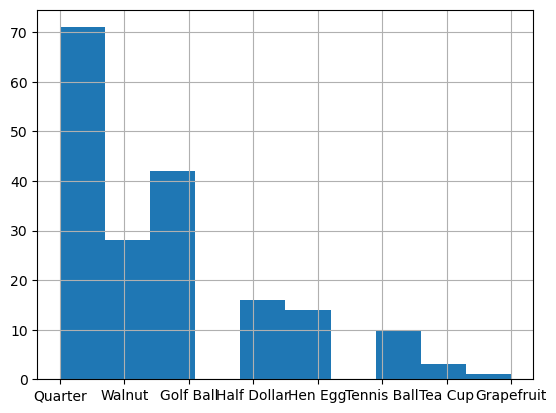

In [11]:
hail_reports['Common Size'].hist()